**CLEANING**

importing needed libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
import re
from statsmodels.stats.anova import anova_lm
import ipywidgets as widgets
from ipywidgets import ToggleButtons, VBox ,interact
import os
import gdown

#### you can download the data from 
https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data

importing dataset for cleaning

In [2]:
cleaning = pd.read_csv('Life Expectancy.csv')

In [3]:
cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

data transformation on "developed" feature

In [4]:
cleaning['Developed'] = cleaning['Status'].replace({'Developed': 1, 'Developing': 0})

C:\Users\egy   star\AppData\Local\Temp\ipykernel_16288\3498334040.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaning['Developed'] = cleaning['Status'].replace({'Developed': 1, 'Developing': 0})


deleting "status", "country","year" since we do not need them for model building

In [5]:
cleaning.drop('Status', axis=1, inplace=True)
cleaning.drop('Country', axis=1, inplace=True)
cleaning.drop('Year', axis=1, inplace=True)

inspecting data

In [6]:
cleaning.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0


checking data types & if missing values exist

In [7]:
cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2928 non-null   float64
 1   Adult Mortality                  2928 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   Alcohol                          2744 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   Hepatitis B                      2385 non-null   float64
 6   Measles                          2938 non-null   int64  
 7    BMI                             2904 non-null   float64
 8   under-five deaths                2938 non-null   int64  
 9   Polio                            2919 non-null   float64
 10  Total expenditure                2712 non-null   float64
 11  Diphtheria                       2919 non-null   float64
 12   HIV/AIDS           

### attributes values meaning
Adult Mortality: The probability of dying between the ages of 15 and 60 years per 1000 population.
Infant Deaths: The number of infant deaths per 1000 live births in a given year.

Alcohol: The average annual alcohol consumption per capita (age 15 and older), measured in liters of pure alcohol.

Percentage Expenditure: Expenditure on health as a percentage of Gross Domestic Product (GDP) per capita.

Hepatitis B: The percentage of children under 1 year of age who have received the Hepatitis B vaccine.

Measles: The number of reported measles cases per 1000 population.

BMI: Body Mass Index, a measure of body fat based on height and weight.

Under-five Deaths: The number of deaths under age five per 1000 live births in a given year.

Total Expenditure: Total government and private expenditure on health as a percentage of GDP.

Diphtheria: The percentage of children under 1 year of age who have received the diphtheria-tetanus-pertussis (DTP3) vaccine.

HIV/AIDS: The estimated percentage of adults aged 15-49 living with HIV/AIDS.

GDP: Gross Domestic Product, the total value of goods and services produced by a country in a year.

Population: The total population of a country.

Thinness 1-19 Years: The percentage of children aged 10-19 who are moderately or severely thin.

Thinness 5-9 Years: The percentage of children aged 5-9 who are moderately or severely thin.

Composition of Resources: A composite index reflecting the overall level of development in terms of income, education, and health resources.

Schooling: The average number of years of schooling completed by adults aged 15 and older.

Developed: A binary indicator (0 or 1) representing whether a country is classified as developed or not.

removing extra whitespaces from attribute names by stripping whitespaces from right and left then used regular expressions to replace long whitespaces with just one

In [8]:
cleaning.columns = cleaning.columns.str.strip().map(lambda x: re.sub(r'\s+', ' ', x))
cleaning.columns.to_list()

['Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness 1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Developed']

dropping rows with missing values of "life expectancy" feature since it is our target. filling missing values there can lead to inaccurate results.

In [9]:
cleaning = cleaning.dropna(subset=['Life expectancy'])

we tried to fill missing values of independant variables with a more accurate way. we searched for features that are strongly correlated with attributes that contain missing values. the following correlation matrix's attributes are some attributes with missing values, and its rows are another features strongly correlated with attributes with missing values

In [10]:
cols_with_na = cleaning.columns[cleaning.isnull().sum() > 0].to_list()
cols_with_na_corr = cleaning.corr()[cols_with_na]
filtered_corr = cols_with_na_corr[cols_with_na_corr.abs() > 0.7]
filtered_corr = filtered_corr[filtered_corr.abs() < 1]
print('count of high correlation scores in the correlation matrix:', filtered_corr.count().sum())
filtered_corr = filtered_corr.dropna(axis=0, how= 'all')
filtered_corr = filtered_corr.dropna(axis=1, how= 'all')
filtered_corr

count of high correlation scores in the correlation matrix: 7


,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,NaN,NaN,NaN,0.724776,0.751975
percentage expenditure,0.89937,NaN,NaN,NaN,NaN
thinness 1-19 years,NaN,NaN,0.938953,NaN,NaN
thinness 5-9 years,NaN,0.938953,NaN,NaN,NaN
Income composition of resources,NaN,NaN,NaN,NaN,0.800046
Schooling,NaN,NaN,NaN,0.800046,NaN


as you can see here. there are really strong linear relationship over searched attributes

In [11]:
plotting_pairs = []

for feature_name in filtered_corr.columns.to_list():
  highly_correlated_cols = filtered_corr[feature_name]
  highly_correlated_cols = highly_correlated_cols.sort_values(ascending=False)
  for index, value in highly_correlated_cols.items():
    if not pd.isnull(value):
      plotting_pairs.append([index, feature_name])

In [12]:
def plot_regression(selected_pair):
    feature1, feature2 = selected_pair.split(' vs ')
    plt.figure(figsize=(8, 6))
    sns.regplot(x=feature1, y=feature2, data=cleaning, marker='o')
    plt.title(f'Regression Plot')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.grid(True)
    plt.show()


# Create a dropdown with each pair of features
pair_options = [f"{pair[0]} vs {pair[1]}" for pair in plotting_pairs]
pair_dropdown = widgets.Dropdown(options=pair_options, description='Feature Pair:')
widgets.interact(plot_regression, selected_pair=pair_dropdown)

interactive(children=(Dropdown(description='Feature Pair:', options=('percentage expenditure vs GDP', 'thinnes…

<function __main__.plot_regression(selected_pair)>

then we tried to fill missing values of each feature in the previous correlation matrix by looping over attributes with missing values and its highly correlated features and making a simple linear regression model where highly correlated feature is the independant variable and the feature with missing values is the dependant variable.
then we tried to predict the missing values of the target with the independant variable values.

In [13]:
def impute(col_name, no_null_dataset, dataset):
  copy = dataset.copy()
  filler_name_list = no_null_dataset.columns.to_list()
  filler_name_list.remove(col_name)
  model = LinearRegression()
  model.fit(no_null_dataset.drop(col_name, axis='columns'), no_null_dataset[col_name])
  missing_rows = copy[copy[col_name].isnull()]
  missing_rows = missing_rows.dropna(subset = filler_name_list)
  X = missing_rows.drop(col_name, axis=1)
  if X.count().sum() > 0:
    predicted_values = model.predict(X)
    copy.loc[missing_rows.index, col_name] = predicted_values
  return copy[col_name]

null_count_before_imputing = cleaning.isna().sum()

for column_to_fill in filtered_corr.columns.to_list():
  correlations = filtered_corr[column_to_fill]
  correlations = correlations.sort_values(ascending=False)
  for filler_column, correlation_value in correlations.items():
    if not pd.isnull(correlation_value):
      dataset_imputing = cleaning[[column_to_fill, filler_column]]
      dataset_imputing_no_null = dataset_imputing.dropna()
      cleaning[column_to_fill] = impute(column_to_fill, dataset_imputing_no_null, dataset_imputing)

null_count_after_imputing = cleaning.isna().sum()

print('number of missing values imputed:', (null_count_before_imputing - null_count_after_imputing).sum())

number of missing values imputed: 763


then we fill the remaining missing values with median values

In [14]:
median_values = cleaning.median()
cleaning.fillna(median_values, inplace=True)

cleaning done. renaming dataset to data for the sake of readability

In [15]:
data = cleaning
print(data.head())

   Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0             65.0            263.0             62     0.01   
1             59.9            271.0             64     0.01   
2             59.9            268.0             66     0.01   
3             59.5            272.0             69     0.01   
4             59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0  

Visualization

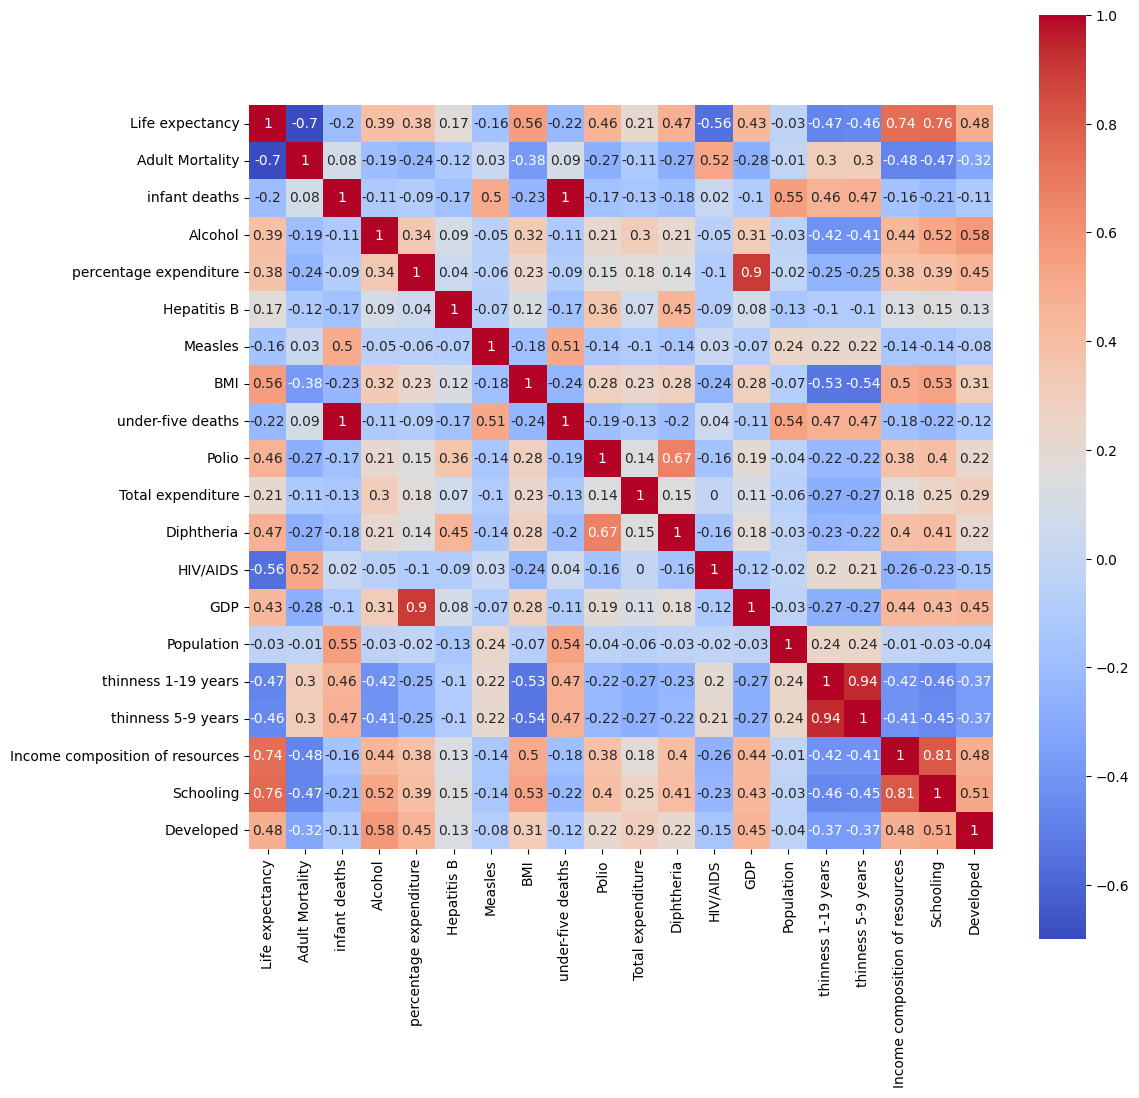

In [16]:
correlation = np.round(data.corr(), 2)
plt.figure(figsize=(12,12))
sns.heatmap(data=correlation, annot=True, cmap='coolwarm', square=True)
plt.show()

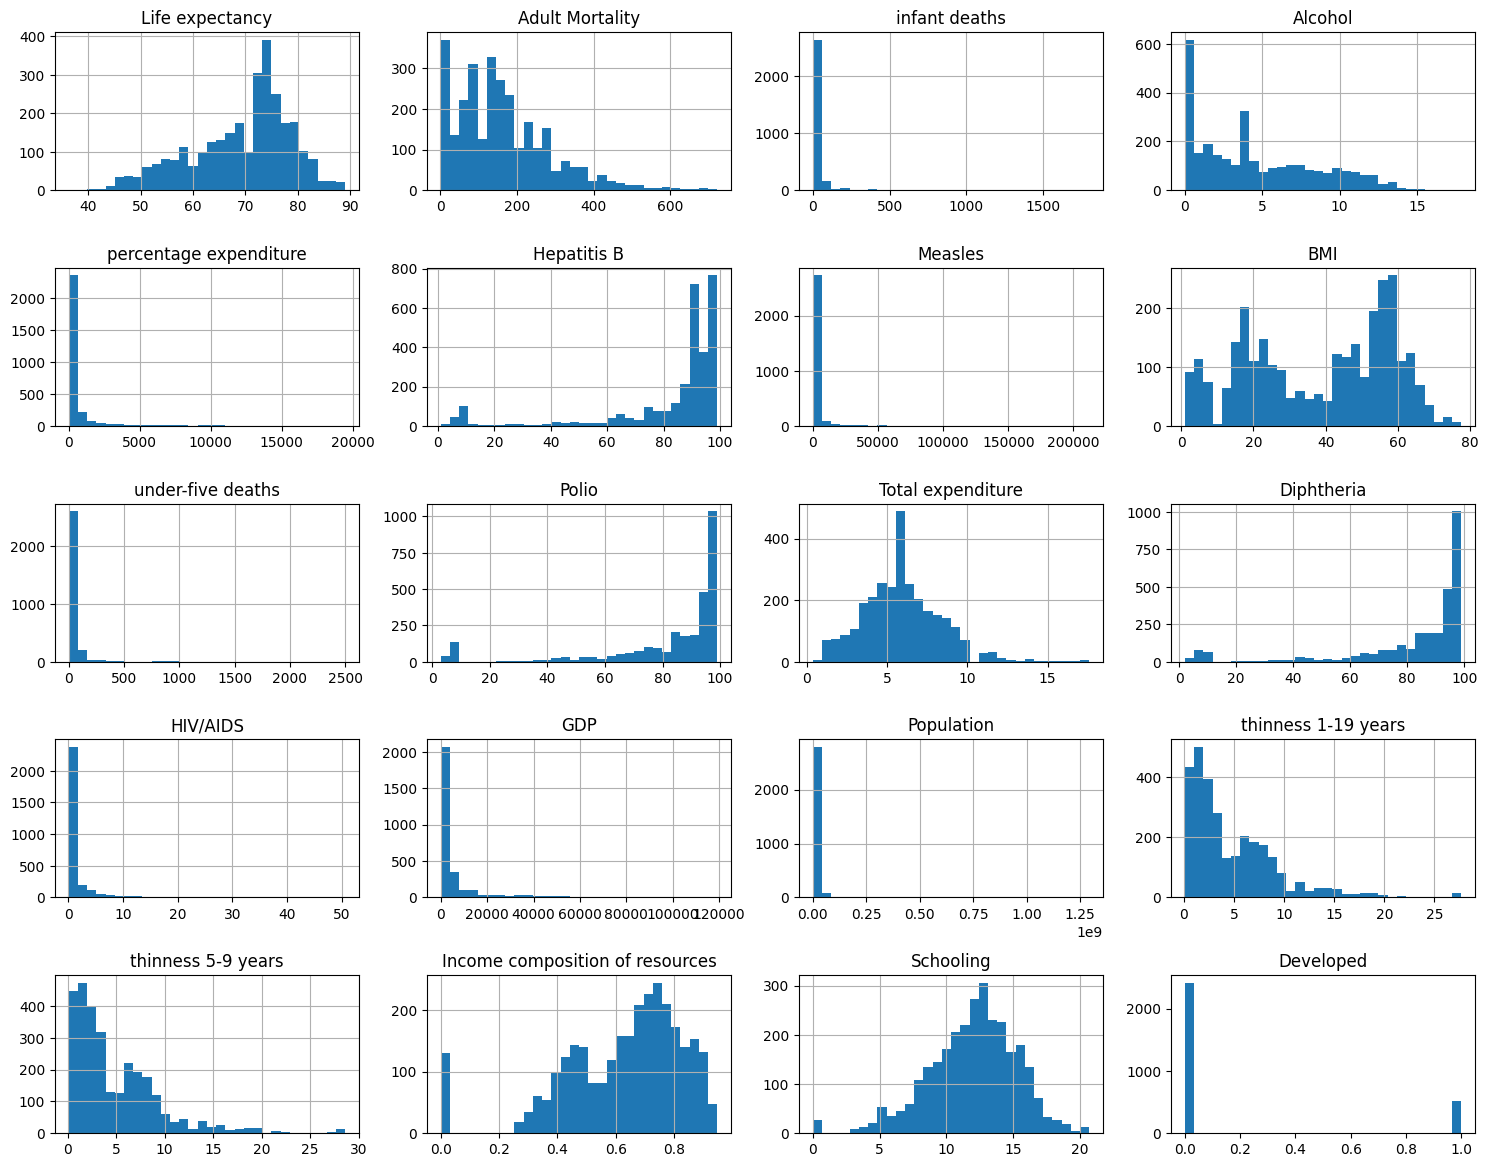

In [17]:
numeric_columns = data.select_dtypes(include=['number']).columns

# Plot histograms
data[numeric_columns].hist(figsize=(15, 12), bins=30)
plt.grid(False)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  
plt.show()

**MODEL**

In [18]:
dropped_columns = ['Life expectancy']
X=data.drop(dropped_columns, axis=1)
y=data['Life expectancy']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed
1911,61.0,0,6.06,177.638288,92.0,3,6.8,0,93.0,9.72,93.0,0.1,975.498560,5137232.0,0.8,0.7,0.945,17.7,1
954,291.0,2,9.02,545.438957,75.0,0,31.9,3,78.0,2.86,81.0,10.0,8352.817110,1489193.0,6.9,6.8,0.645,12.4,0
1049,162.0,0,8.92,754.959713,99.0,0,42.4,0,99.0,5.76,99.0,0.1,7946.944346,1391756.5,3.8,3.9,0.000,15.4,0
1714,185.0,0,2.23,0.000000,87.0,0,61.5,0,85.0,7.88,85.0,0.1,2244.566222,1391756.5,0.3,0.3,0.000,0.0,0
2021,142.0,17,4.22,302.535906,92.0,0,46.1,22,9.0,4.98,9.0,0.5,1981.243653,26261363.0,1.4,1.4,0.677,13.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,63.0,0,7.38,335.518057,86.0,1,67.1,0,73.0,8.33,73.0,0.1,2675.582590,412477.0,0.8,0.7,0.815,14.4,1
1097,297.0,5,2.64,28.301911,92.0,12,21.9,7,77.0,6.50,77.0,6.0,583.544562,148841.0,8.5,8.4,0.398,8.8,0
1132,29.0,17,5.57,38.109043,92.0,0,38.5,24,6.0,4.41,6.0,3.9,465.311876,926344.0,4.4,4.4,0.452,8.2,0
1296,75.0,2,9.69,3.122230,95.0,0,55.7,3,96.0,8.11,93.0,0.1,24.819000,569741.0,0.5,0.5,0.828,14.9,1


In [19]:
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     538.6
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        03:14:34   Log-Likelihood:                -5668.5
No. Observations:                2049   AIC:                         1.138e+04
Df Residuals:                    2029   BIC:                         1.149e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              54.5308      0.673     80.982      0.000      53.210      55.851
Adult Mortality                    -0.0179      0.001    -19.544      0.000      -0.020      -0.016
infant deaths                       0.0934      0.010      9.692      0.000       0.074       0.112
Alcohol                             0.0283      0.030      0.945      0.345      -0.030       0.087
percentage expenditure              0.0001      0.000      1.118      0.264   -8.64e-05       0.000
Hepatitis B                        -0.0116      0.004     -2.715      0.007      -0.020      -0.003
Measles                         -1.833e-05   8.39e-06     -2.184      0.029   -3.48e-05   -1.87e-06
BMI                                 0.0341      0.006      6.040      0.000       0.023       0.045
under-five deaths                  -0.0686      0.007     -9.821      0.000      -0.082      -0.055
Polio                               0.0271      0.005      5.322      0.000       0.017       0.037
Total expenditure                   0.0125      0.039      0.323      0.747      -0.063       0.088
Diphtheria                          0.0295      0.005      5.725      0.000       0.019       0.040
HIV/AIDS                           -0.5021      0.020    -25.304      0.000      -0.541      -0.463
GDP                              3.066e-05   1.52e-05      2.016      0.044    8.32e-07    6.05e-05
Population                      -2.492e-09   1.98e-09     -1.257      0.209   -6.38e-09     1.4e-09
thinness 1-19 years                -0.0755      0.053     -1.430      0.153      -0.179       0.028
thinness 5-9 years                 -0.0183      0.052     -0.352      0.725      -0.121       0.084
Income composition of resources     6.8265      0.725      9.413      0.000       5.404       8.249
Schooling                           0.7658      0.048     15.922      0.000       0.671       0.860
Developed                           1.2014      0.308      3.900      0.000       0.597       1.806
==============================================================================
Omnibus:                      115.742   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.635
Skew:                           0.035   Prob(JB):                    1.55e-100
Kurtosis:                       5.319   Cond. No.                     4.64e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.64e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
y_pred=model.predict(sm.add_constant(X_test))
r2 = r2_score(y_test, y_pred)
y_train_pred = model.predict(sm.add_constant(X_train))
print('r2 score:', round(r2*100, 2),'%')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('rooted mean square error of testing set:', round(rmse, 2))
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('rooted mean square error of training set:', round(rmse_train, 2))
print('\ndistribution of life expectancy:')
data['Life expectancy'].describe()

r2 score: 84.19 %
rooted mean square error of testing set: 3.84
rooted mean square error of training set: 3.85

distribution of life expectancy:


count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy, dtype: float64

We got a good r2 score between testing data and the predicted life expectancy which is quite good.
Also, the rmse scores of training set and the testing set are close to each other which indicates that the model has learned the underlying patterns in the data without overfitting to the training set.

In [ ]:
numeric_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

def create_plot(column):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=column, y='Life expectancy', data=data, marker='o')
    plt.title(f'Regression Plot: Life Expectancy vs {column}')
    plt.xlabel(column)
    plt.ylabel('Life Expectancy')
    plt.grid(True)
    plt.show()

col_buttons = ToggleButtons(options=numeric_columns, description='Features')

interactive_plot = widgets.interactive_output(create_plot, {'column': col_buttons})
VBox([col_buttons, interactive_plot])

Partial F-test
To clarify the impact of removing of each attribute separatelly on the full model and the significance of each one

In [22]:
from tabulate import tabulate

# Create an empty list to store the results
results = []

# Loop over each column in X to create reduced models
for col in X.columns:
    X_full_new = X.drop(col, axis=1)
    full_model = sm.OLS(y, sm.add_constant(X)).fit()
    reduced_model = sm.OLS(y, sm.add_constant(X_full_new)).fit()
    rss_full = np.sum((y - full_model.predict(sm.add_constant(X))) ** 2)
    rss_reduced = np.sum((y - reduced_model.predict(sm.add_constant(X_full_new))) ** 2)
    df_full = X.shape[0] - X.shape[1] - 1
    df_reduced = X_full_new.shape[0] - X_full_new.shape[1] - 1

    # Calculate F-statistic
    RSS_Reduction = (rss_reduced - rss_full) / (df_reduced - df_full)
    MSE_FullModel = rss_full / df_full
    f_statistic = RSS_Reduction / MSE_FullModel

    # Calculate p-value
    p_value = stats.f.sf(f_statistic, df_reduced - df_full, df_full)

    # Make predictions using the full and reduced models
    y_pred_full = full_model.predict(sm.add_constant(X))
    y_pred_reduced = reduced_model.predict(sm.add_constant(X_full_new))

    # Calculate R^2 score for the full and reduced models
    r2_full = r2_score(y, y_pred_full)
    r2_reduced = r2_score(y, y_pred_reduced)

    # Append results to the list
    results.append([col, f_statistic, p_value, r2_full, r2_reduced])

# Print the results in a table
print(tabulate(results, headers=['Feature', 'F-statistic', 'p-value', 'R2 for Full Model', 'R2 for Reduced Model'],
               tablefmt='grid'))



+---------------------------------+---------------+--------------+---------------------+------------------------+
| Feature                         |   F-statistic |      p-value |   R2 for Full Model |   R2 for Reduced Model |
+=================================+===============+==============+=====================+========================+
| Adult Mortality                 |  527.902      | 1.73361e-107 |            0.837542 |               0.80805  |
+---------------------------------+---------------+--------------+---------------------+------------------------+
| infant deaths                   |  127.245      | 6.48662e-29  |            0.837542 |               0.830433 |
+---------------------------------+---------------+--------------+---------------------+------------------------+
| Alcohol                         |    0.102756   | 0.748571     |            0.837542 |               0.837536 |
+---------------------------------+---------------+--------------+---------------------+

### Attributes with minimal impact on model's performance:
based on comparing associated p_value to a significance level (alpha)

In [23]:
attributes_to_drop = []
alpha = 0.05

# Iterate through the results
for result in results:
    feature = result[0]
    p_value = result[2]

    # Compare p-value to significance level
    if p_value > alpha:
        attributes_to_drop.append(feature)

print("Attributes with minimal impact on model's performance:", attributes_to_drop)

Attributes with minimal impact on model's performance: ['Alcohol', 'percentage expenditure', 'Measles', 'Total expenditure', 'Population', 'thinness 1-19 years', 'thinness 5-9 years']


multicoliniarity check

In [24]:
def multicollinearity(df,threshold):
    corelation_dict = {}
    corr_mat = df.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])> threshold:
                col_name= corr_mat.columns[i]
                corelation_dict[col_name] = abs(corr_mat.iloc[i,j])
                corelation_dict = dict(sorted(corelation_dict.items(), key=lambda item: item[1]))
    return list(corelation_dict.keys())

In [25]:
cor_cols = multicollinearity(X_train, 0.7)
print(cor_cols)

['Schooling', 'GDP', 'thinness 5-9 years', 'under-five deaths']


calculate MSE values for each feature

In [26]:
def univariate(x_tr, y_tr, x_test, y_test):
    mse_values = []
    for feature in x_tr.columns:
        x_tr_feature = x_tr[[feature]]
        x_test_feature = x_test[[feature]]
        model = LinearRegression()
        model.fit( x_tr_feature, y_tr)
        y_pred = model.predict(x_test_feature)
        mse_values.append(mean_squared_error(y_test, y_pred))

    return mse_values

['Population', 'Measles', 'infant deaths', 'Hepatitis B', 'under-five deaths', 'Total expenditure', 'percentage expenditure', 'Alcohol', 'GDP', 'thinness 5-9 years', 'thinness 1-19 years', 'Polio', 'Developed', 'Diphtheria', 'HIV/AIDS', 'BMI', 'Adult Mortality', 'Income composition of resources', 'Schooling']
Population                         93.506504
Measles                            92.229687
infant deaths                      91.396993
Hepatitis B                        91.054321
under-five deaths                  90.436776
Total expenditure                  88.418731
percentage expenditure             80.156600
Alcohol                            80.149870
GDP                                75.599656
thinness 5-9 years                 74.605135
thinness 1-19 years                74.299562
Polio                              73.448327
Developed                          72.230682
Diphtheria                         71.838957
HIV/AIDS                           65.134835
BMI           

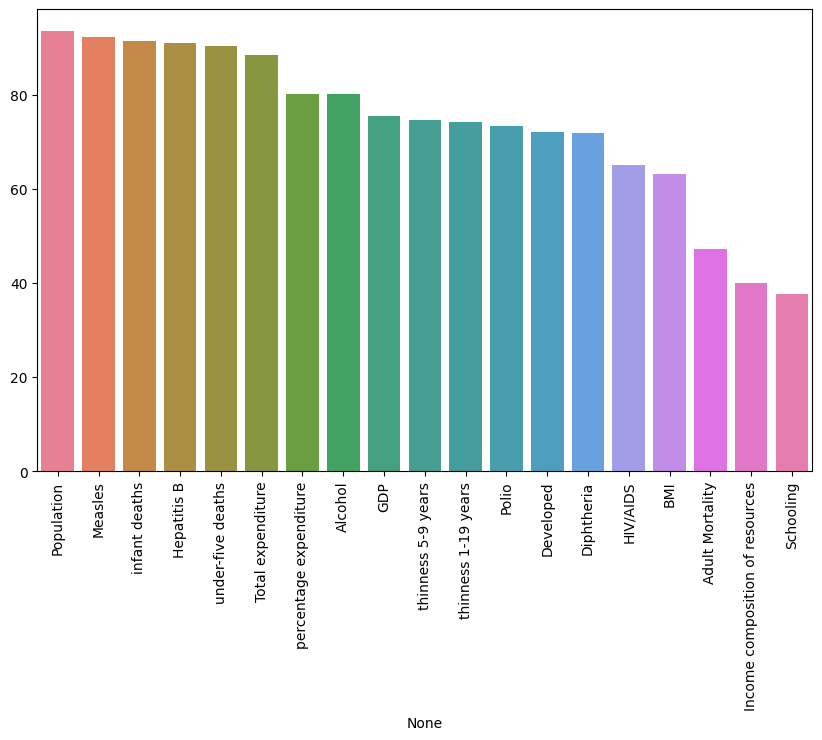

In [27]:
x = data.loc[:, data.columns != 'Life expectancy']
y = data.loc[:,'Life expectancy']
X_train, X_test , y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=42)
mse_values = univariate(X_train, y_train, X_test ,y_test)
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values= mse_values.sort_values(ascending = False)
highest_mse_features = mse_values.index.tolist()
print(highest_mse_features)
print(mse_values)
plt.figure(figsize=(10, 6))
sns.barplot(x = mse_values.index,y = mse_values.values, hue = mse_values.index ,legend=False,palette = "husl")
plt.xticks(rotation=90)
plt.show()

#### Trying to find an improved model depending on p-value of each feature selection type and R2 adjusted score

ANOVA Test

In [28]:
def ANOVA_test(model, attributes_to_drop, data):
    dropped_columns = attributes_to_drop + ['Life expectancy']
    X = data.drop(dropped_columns, axis=1)
    y = data['Life expectancy']
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    X_train = sm.add_constant(X_train)
    reduced_model = sm.OLS(y_train, X_train).fit()
    anova_results = anova_lm(reduced_model, model)
    return anova_results , reduced_model.summary() 


If the p-value (PR(>F)) is small (commonly less than 0.05), this suggests that the full model provides a significantly better fit to the data than the reduced model, justifying the inclusion of additional predictors.

In [29]:
#Partial f test drop
anova_table, reduced_summary = ANOVA_test(model, attributes_to_drop, data)

print("ANOVA Test:")
print(anova_table)

print("\nReduced Model Summary:")
print(reduced_summary)

ANOVA Test:
   df_resid          ssr  df_diff     ss_diff         F   Pr(>F)
0    2036.0  30675.91698      0.0         NaN       NaN      NaN
1    2029.0  30337.46294      7.0  338.454041  3.233735  0.00205

Reduced Model Summary:
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     844.3
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        03:16:35   Log-Likelihood:                -5679.8
No. Observations:                2049   AIC:                         1.139e+04
Df Residuals:                    2036   BIC:                         1.146e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                     

The p-value is less than 0.05, indicating that the improvements in the full model are statistically significant.
There is no change in R2 adjusted score.

In [30]:
#multicullinarity drop
cor_cols = ['GDP', 'under-five deaths']
anova_table, reduced_summary = ANOVA_test(model, cor_cols, data)

print("ANOVA Test:")
print(anova_table)

print("\nReduced Model Summary:")
print(reduced_summary)

ANOVA Test:
   df_resid           ssr  df_diff      ss_diff          F        Pr(>F)
0    2031.0  31815.801549      0.0          NaN        NaN           NaN
1    2029.0  30337.462940      2.0  1478.338609  49.436386  1.088347e-21

Reduced Model Summary:
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     569.0
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        03:17:10   Log-Likelihood:                -5717.2
No. Observations:                2049   AIC:                         1.147e+04
Df Residuals:                    2031   BIC:                         1.157e+04
Df Model:                          17                                         
Covariance Type:            nonrob

The p-value is extremely small, This strongly supports the inclusion of the additional predictors in the full model. 
The R2 reduced from 83.4% to 82.8%

In [31]:
#mse drop
dropped=highest_mse_features[0:6]
anova_table, reduced_summary = ANOVA_test(model, dropped , data)

print("ANOVA Test:")
print(anova_table)

print("\nReduced Model Summary:")
print(reduced_summary)

ANOVA Test:
   df_resid           ssr  df_diff      ss_diff          F        Pr(>F)
0    2035.0  32155.409276      0.0          NaN        NaN           NaN
1    2029.0  30337.462940      6.0  1817.946336  20.264346  3.894171e-23

Reduced Model Summary:
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     736.0
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        03:17:19   Log-Likelihood:                -5728.1
No. Observations:                2049   AIC:                         1.148e+04
Df Residuals:                    2035   BIC:                         1.156e+04
Df Model:                          13                                         
Covariance Type:            nonrob

The p-value is extremely small too. The R2 adjusted has reduced to 82.6%
So we indicate that the full model has the best results

In [ ]:
import ipywidgets as widgets
from IPython.display import display

def percentage_from_median(value, data):

    sorted_data = sorted(data)
    data_length = len(sorted_data)

    # Calculate the median
    median_index = data_length // 2
    median = sorted_data[median_index] if data_length % 2 != 0 else (sorted_data[median_index - 1] + sorted_data[median_index]) / 2

    # Calculate the range of the dataset
    data_range = max(data) - min(data)

    # Calculate the absolute difference between the value and the median
    absolute_difference = value - median

    # Calculate the percentage
    percentage = (absolute_difference / data_range) * 100

    return percentage

def predict(Adult_Mortality, schooling, infant_deaths, Alcohol, percentage_expenditure,Hepatitis_B, Measles, BMI, under_five_deaths, Polio, Total_expenditure, Diphtheria, HIV_AIDS, GDP, Population, thinness_1_19_years, thinness_5_9_years, Income_composition_of_resources, Developed):
  X_new_single = pd.DataFrame({
    'const': [1],
    'Adult Mortality': [Adult_Mortality],
    'infant deaths': [infant_deaths],
    'Alcohol': [Alcohol],
    'percentage expenditure': [percentage_expenditure],
    'Hepatitis B': [Hepatitis_B],
    'Measles': [Measles],
    'BMI': [BMI],
    'under-five deaths': [under_five_deaths],
    'Polio': [Polio],
    'Total expenditure': [Total_expenditure],
    'Diphtheria': [Diphtheria],
    'HIV/AIDS': [HIV_AIDS],
    'GDP': [GDP],
    'Population': [Population],
    'thinness 1-19 years': [thinness_1_19_years],
    'thinness 5-9 years': [thinness_5_9_years],
    'Income composition of resources': [Income_composition_of_resources],
    'Schooling': [schooling],
    'Developed': [Developed]
  })
  positive_coefs = {}
  negative_coefs = {}
  suggestions = []
  for column in X_new_single.drop('const', axis='columns').columns:
    how_far = percentage_from_median(X_new_single[column].iloc[0], data[column])
    coef = full_model.params[column]
    if coef < 0 and how_far > 0:
      negative_coefs[column] = how_far
    elif coef > 0 and how_far < 0:
      positive_coefs[column] = how_far

  positive_coefs = dict(sorted(positive_coefs.items(), key=lambda item: item[1]))
  negative_coefs = dict(sorted(negative_coefs.items(), key=lambda item: item[1], reverse=True))
  first_six_keys = list(negative_coefs.keys())[:3] + list(positive_coefs.keys())[:3]
  for index, column in enumerate(first_six_keys):
    coef = full_model.params[column]
    if coef < 0:
      first_six_keys[index] = 'countries with less value of ' + column + ' tend to have higher life expectancy'
    else:
      first_six_keys[index] = 'countries with higher value of ' + column + ' tend to have higher life expectancy'
  print(first_six_keys)
  return 'predicted life expectancy: ' + str(round(model.predict(X_new_single)[0], 2))
# Define input widgets
def init_ui():
  Adult_Mortality_input = widgets.FloatText(
      value= data['Adult Mortality'].median(),
      step=1,
      description='adult mortality:',
      style={'description_width': 'initial'}
  )

  infant_deaths_input = widgets.IntText(
      value= data['infant deaths'].median(),
      step=1,
      description='infant deaths:',
      style={'description_width': 'initial'}
  )

  Alcohol_input = widgets.FloatText(
      value= data['Alcohol'].median(),
      step=1,
      description='Alcohol:',
      style={'description_width': 'initial'}
  )

  percentage_expenditure_input = widgets.FloatText(
      value= data['percentage expenditure'].median(),
      step=1,
      description='percentage expenditure:',
      style={'description_width': 'initial'}
  )

  Hepatitis_B_input = widgets.FloatText(
      value= data['Hepatitis B'].median(),
      step=1,
      description='Hepatitis B:',
      style={'description_width': 'initial'}
  )

  Measles_input = widgets.FloatText(
      value= data['Measles'].median(),
      step=1,
      description='Measles:',
      style={'description_width': 'initial'}
  )

  BMI_input = widgets.FloatText(
      value= data['BMI'].median(),
      step=1,
      description='BMI:',
      style={'description_width': 'initial'}
  )

  under_five_deaths_input = widgets.IntText(
      value= data['under-five deaths'].median(),
      step=1,
      description='under-five deaths:',
      style={'description_width': 'initial'}
  )

  Polio_input = widgets.FloatText(
      value= data['Polio'].median(),
      step=1,
      description='Polio:',
      style={'description_width': 'initial'}
  )

  Total_expenditure_input = widgets.FloatText(
      value= data['Total expenditure'].median(),
      step=1,
      description='Total expenditure:',
      style={'description_width': 'initial'}
  )

  Diphtheria_input = widgets.FloatText(
      value= data['Diphtheria'].median(),
      step=1,
      description='Diphtheria:',
      style={'description_width': 'initial'}
  )

  HIV_AIDS_input = widgets.FloatText(
      value= data['HIV/AIDS'].median(),
      step=1,
      description='HIV/AIDS:',
      style={'description_width': 'initial'}
  )

  GDP_input = widgets.FloatText(
      value= data['GDP'].median(),
      step=1,
      description='GDP:',
      style={'description_width': 'initial'}
  )

  Population_input = widgets.FloatText(
      value= data['Population'].median(),
      step=1,
      description='Population:',
      style={'description_width': 'initial'}
  )

  thinness_1_19_years_input = widgets.FloatText(
      value= data['thinness 1-19 years'].median(),
      step=1,
      description='thinness 1-19 years:',
      style={'description_width': 'initial'}
  )

  thinness_5_9_years_input = widgets.FloatText(
      value= data['thinness 5-9 years'].median(),
      step=1,
      description='thinness 5-9 years:',
      style={'description_width': 'initial'}
  )

  Income_composition_of_resources_input = widgets.FloatText(
      value= data['Income composition of resources'].median(),
      step=1,
      description='Income composition of resources:',
      style={'description_width': 'initial'}
  )

  Developed_input = widgets.IntSlider(
      value= data['Developed'].median(),
      step=1,
      description='Developed:',
      max=1,
      style={'description_width': 'initial'}
  )

  schooling_input = widgets.FloatText(
      value= data['Schooling'].median(),
      step=1,
      description='schooling:',
      style={'description_width': 'initial'}
  )

  # Define button widget
  submit_button = widgets.Button(description="Submit")

  # Define output widget
  output_text = widgets.Output()

  # Define function to handle form submission
  def handle_submit(sender):
      with output_text:
          output_text.clear_output()
          print(predict(Adult_Mortality_input.value, schooling_input.value, infant_deaths_input.value, Alcohol_input.value, percentage_expenditure_input.value,Hepatitis_B_input.value, Measles_input.value, BMI_input.value, under_five_deaths_input.value, Polio_input.value, Total_expenditure_input.value, Diphtheria_input.value, HIV_AIDS_input.value, GDP_input.value, Population_input.value, thinness_1_19_years_input.value, thinness_5_9_years_input.value, Income_composition_of_resources_input.value, Developed_input.value))

  # Attach event handler to button click
  submit_button.on_click(handle_submit)

  # Display the form
  display(Adult_Mortality_input, schooling_input, infant_deaths_input, Alcohol_input, percentage_expenditure_input,Hepatitis_B_input, Measles_input, BMI_input, under_five_deaths_input, Polio_input, Total_expenditure_input, Diphtheria_input, HIV_AIDS_input, GDP_input, Population_input, thinness_1_19_years_input, thinness_5_9_years_input, Income_composition_of_resources_input, Developed_input, submit_button, output_text)

init_ui()

FloatText(value=144.0, description='adult mortality:', step=1.0, style=DescriptionStyle(description_width='ini…

FloatText(value=12.3, description='schooling:', step=1.0, style=DescriptionStyle(description_width='initial'))

IntText(value=3, description='infant deaths:', style=DescriptionStyle(description_width='initial'))

FloatText(value=3.77, description='Alcohol:', step=1.0, style=DescriptionStyle(description_width='initial'))

FloatText(value=65.61145482, description='percentage expenditure:', step=1.0, style=DescriptionStyle(descripti…

FloatText(value=92.0, description='Hepatitis B:', step=1.0, style=DescriptionStyle(description_width='initial'…

FloatText(value=17.0, description='Measles:', step=1.0, style=DescriptionStyle(description_width='initial'))

FloatText(value=43.349999999999994, description='BMI:', step=1.0, style=DescriptionStyle(description_width='in…

IntText(value=4, description='under-five deaths:', style=DescriptionStyle(description_width='initial'))

FloatText(value=93.0, description='Polio:', step=1.0, style=DescriptionStyle(description_width='initial'))

FloatText(value=5.75, description='Total expenditure:', step=1.0, style=DescriptionStyle(description_width='in…

FloatText(value=93.0, description='Diphtheria:', step=1.0, style=DescriptionStyle(description_width='initial')…

FloatText(value=0.1, description='HIV/AIDS:', step=1.0, style=DescriptionStyle(description_width='initial'))

FloatText(value=2244.566221883393, description='GDP:', step=1.0, style=DescriptionStyle(description_width='ini…

FloatText(value=1391756.5, description='Population:', step=1.0, style=DescriptionStyle(description_width='init…

FloatText(value=3.3, description='thinness 1-19 years:', step=1.0, style=DescriptionStyle(description_width='i…

FloatText(value=3.4, description='thinness 5-9 years:', step=1.0, style=DescriptionStyle(description_width='in…

FloatText(value=0.675, description='Income composition of resources:', step=1.0, style=DescriptionStyle(descri…

IntSlider(value=0, description='Developed:', max=1, style=SliderStyle(description_width='initial'))

Button(description='Submit', style=ButtonStyle())

Output()